In [1]:
import numpy as np 
import pandas as pd
import tifffile as tiff
import matplotlib.pyplot as plt

255
2


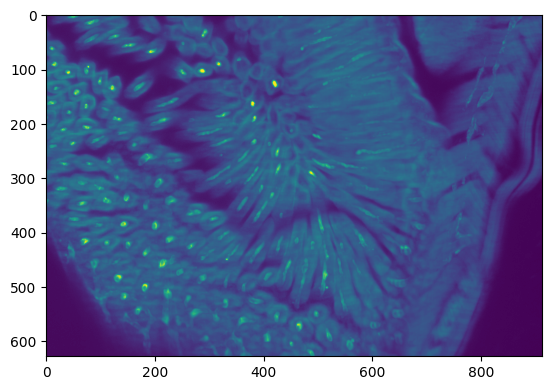

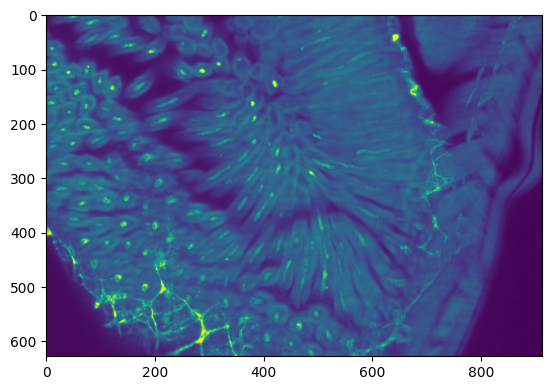

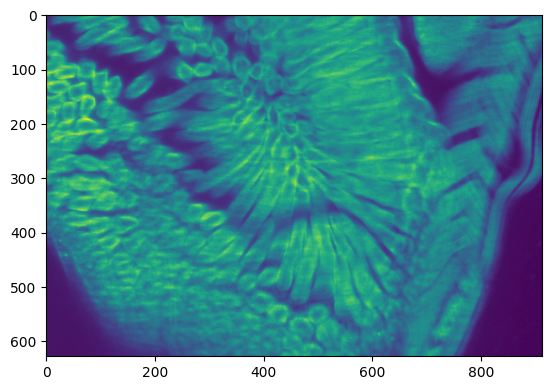

255


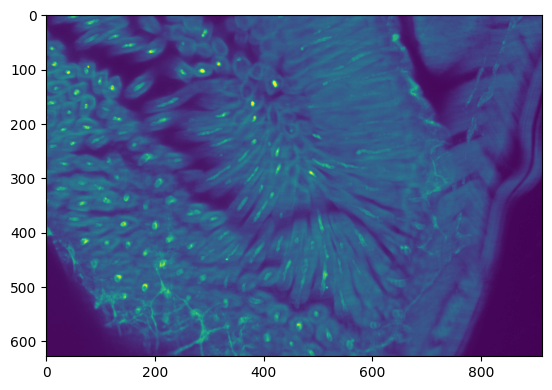

In [2]:
raw1 =  "../Intestine/raw_data/stacked_raw_nerve_lymph.tif"

raw1_tif = tiff.imread(raw1)

raw1_np = np.array(raw1_tif)

raw1_np.shape


print(np.max(raw1_np))
print(np.min(raw1_np))


yellow = raw1_np[:,:,:,0].astype("uint16") +raw1_np[:,:,:,1].astype("uint16")

yellow = yellow/2
yellow = yellow.astype("uint16")

for i in range(3):
    plt.imshow(raw1_np[48,:,:,i])
    plt.show()

plt.imshow(yellow[48,:,:])
print(np.max(yellow))

In [3]:
from skimage.io import imread, imshow
from skimage.color import rgb2hsv

img_hsv = rgb2hsv(raw1_np)


def colorBasedMasking(img_hsv, lower, upper, sat):
    lower_mask = img_hsv[:,:,:,0] > lower #refer to hue channel (in the colorbar)
    upper_mask = img_hsv[:,:,:,0] < upper #refer to transparency channel (in the colorbar)
    saturation_mask = img_hsv[:,:,:,1] > sat
    
    mask = upper_mask * lower_mask * saturation_mask

    return mask

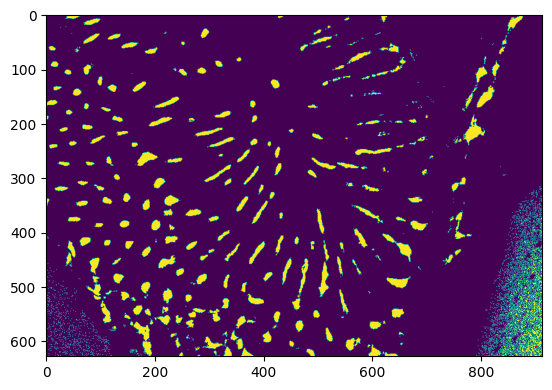

[7 7 6]
True


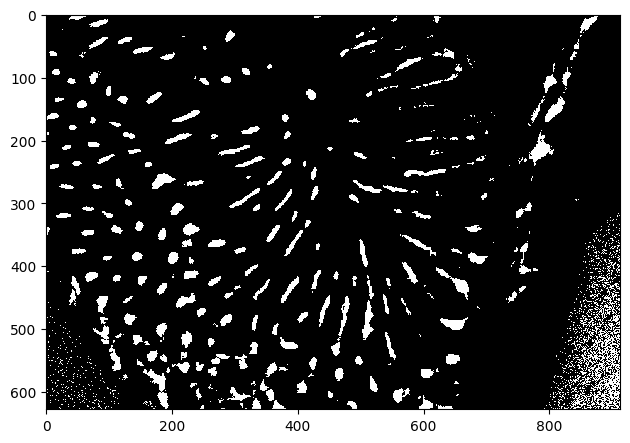

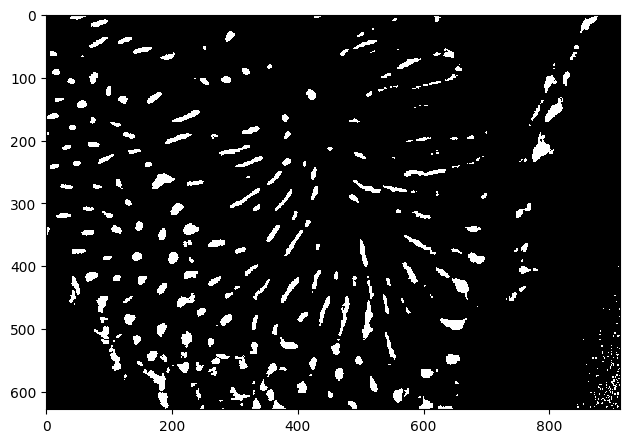

uint8


In [6]:
from skimage.io import imread, imshow
from skimage.color import rgb2hsv
from matplotlib.patches import Circle
from scipy import ndimage


mask_yellow = colorBasedMasking(img_hsv, 0.10, 0.2, 0.12)

p = Circle((901,610), radius =1, color = "red")

fig, ax = plt.subplots()
ax.imshow(mask_yellow[48,:,:])
ax.add_patch(p)
plt.show()

print(raw1_np[48,610,901,:])
print(mask_yellow[48,610,901])

mask_yellow_rm = ndimage.binary_fill_holes(mask_yellow, structure = np.ones((3,3,3)))

imshow(mask_yellow_rm[48,:,:])
plt.show()
#mask_yellow_rm = ndimage.binary_erosion(mask_yellow, structure = np.ones((2,2,2)))
#mask_yellow_rm = ndimage.binary_propagation(mask_yellow_rm, structure = np.ones((2,2,2)), mask = mask_yellow)

mask_yellow_rm = ndimage.binary_opening(mask_yellow_rm, structure = np.ones((2,2,2))) #, iterations = 2, brute_force=True
mask_yellow_rm = ndimage.binary_opening(mask_yellow_rm, structure = np.ones((2,2,2))) 
mask_yellow_rm = ndimage.binary_opening(mask_yellow_rm, structure = np.ones((2,2,2))) 
mask_yellow_rm = ndimage.binary_opening(mask_yellow_rm, structure = np.ones((2,2,2))) 
mask_yellow_rm = ndimage.binary_opening(mask_yellow_rm, structure = np.ones((2,2,2))) 

#inv_mask = 1- mask_yellow_rm
#mask_yellow_rm = 1- inv_mask_rm
#mask_yellow_rm = mask_yellow_rm.astype("bool")

imshow(mask_yellow_rm[48,:,:])
plt.show()

mask_yellow_rm = mask_yellow_rm.astype("uint8")*255

print(mask_yellow_rm.dtype)

tiff.imwrite("../Intestine/raw_data/simple_lymph_mask.tif", mask_yellow_rm)


In [ ]:
raw1_np_hsv = rgb2hsv(raw1_np)
raw_hsv_slice = raw1_np_hsv[48,:,:,:]

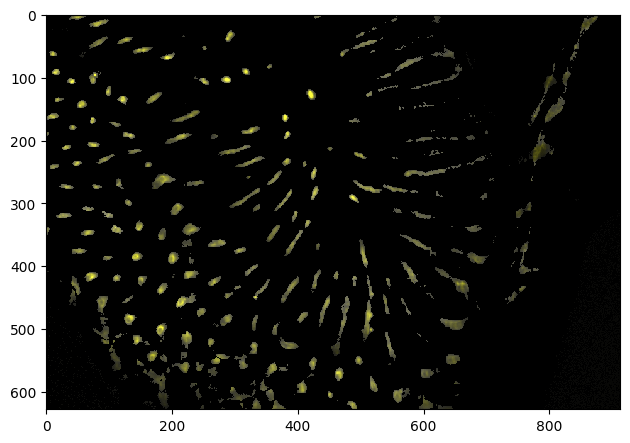

In [141]:
#refer to hue channel (in the colorbar)
lower_mask = raw_hsv_slice[:,:,0] > 0.1 #refer to hue channel (in the colorbar)
upper_mask = raw_hsv_slice[:,:,0] < 0.2 #refer to transparency channel (in the colorbar)
saturation_mask = raw_hsv_slice[:,:,1] > 0.1
 
mask = upper_mask*lower_mask*saturation_mask

red = raw1_np[48,:,:,0]*mask
green = raw1_np[48,:,:,1]*mask
blue = raw1_np[48,:,:,2]*mask
bags_masked = np.dstack((red,green,blue))
imshow(bags_masked)

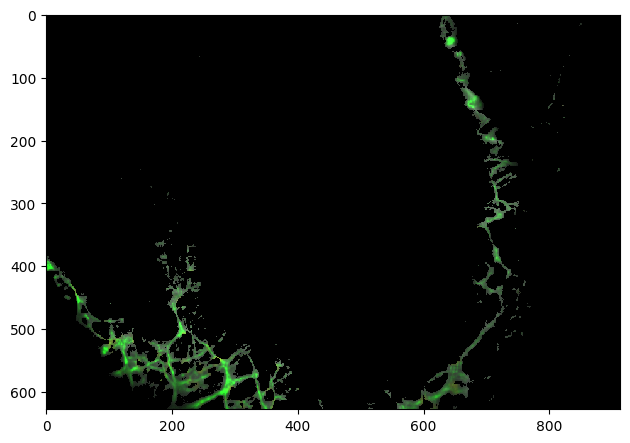

In [127]:
#refer to hue channel (in the colorbar)
lower_mask = raw_hsv_slice[:,:,0] > 0.2 #refer to hue channel (in the colorbar)
upper_mask = raw_hsv_slice[:,:,0] < 0.4 #refer to transparency channel (in the colorbar)
saturation_mask = raw_hsv_slice[:,:,1] > 0.1
 
mask = upper_mask*lower_mask*saturation_mask

red = raw1_np[48,:,:,0]*mask
green = raw1_np[48,:,:,1]*mask
blue = raw1_np[48,:,:,2]*mask
bags_masked = np.dstack((red,green,blue))
imshow(bags_masked)

(131, 628, 913)


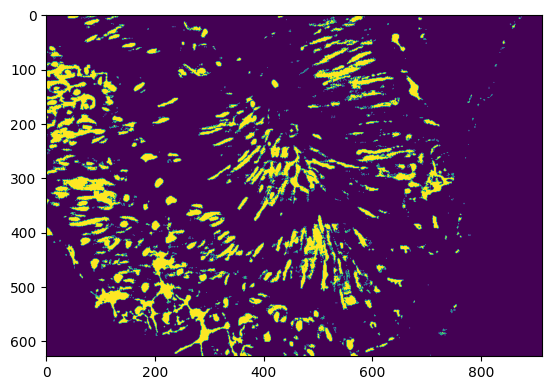

In [57]:
# try to do some annotation by threshold 
threshold, upper, lower = 90, 1, 0
res = np.where(raw1_np[:,:,:,0] > threshold, 1, 0)

res = np.where(yellow > threshold, 1, 0)

print(res.shape)
fig, ax = plt.subplots()

ax.imshow(res[48,:,:])
